In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [56]:
df = pd.read_csv("merged_X.csv")

In [57]:
df = df.rename(columns = {'Unnamed: 0':'Code'})

In [58]:
# The temp_avg

In [59]:
security = pd.read_excel("security_wait_times.xls")

In [60]:
list = []
>>> for i in range(759):
>>>    list.append(0.0)
security['security_avg'] = list
security.columns

Index(['Code', 'Airport', 'Checkpoint', '2015 December', '2014 December',
       '2013 December', '2012 December', '2011 December', '2010 December',
       '2009 December',
       ...
       '2014 January', '2013 January', '2012 January', '2011 January',
       '2010 January', '2009 January', '2008 January', '2007 January',
       '2006 January', 'security_avg'],
      dtype='object', length=129)

In [61]:
def calculate_avg(df):
    for index,row in df.iterrows():
        row_sub = row[3:128]
        time = 0
        sums = 0
        for i in row_sub:
            if i>0:
                time = time + 1
                sums = sums + i
        df.at[index,'security_avg'] = sums/time
    return df

In [62]:
security = calculate_avg(security)

In [63]:
df.columns

Index(['Code', 'city_name', 'code4', 'latitude', 'longitude', 'altitude_ft',
       'city_id', 'fips', 'temp_avg', 'pcp_avg', 'strike_avg', 'damage_avg',
       'city_population', 'enplanements', 'length_ft_sum', 'width_ft_avg'],
      dtype='object')

In [64]:
security_sub = security.loc[:,['Code','Airport','security_avg']]

In [65]:
security_sum = security_sub.groupby('Code').sum()


In [66]:
df = df.rename(columns = {'Unnamed: 0':'Code'})

In [67]:
df = df.merge(security_sum, how = 'left', on = 'Code')

In [68]:
df

,Code,city_name,code4,latitude,longitude,altitude_ft,city_id,fips,temp_avg,pcp_avg,strike_avg,damage_avg,city_population,enplanements,length_ft_sum,width_ft_avg,security_avg
0,ABE,allentown,KABE,40.652100,-75.440804,393.0,10988,42077,51.902490,4.161037,5.250000,0.166667,682899.0,517148.0,13397.0,150.000000,2.450000
1,ABI,abilene,KABI,32.411301,-99.681900,1791.0,5333,48441,64.488797,2.131411,0.750000,0.083333,114964.0,123699.5,18078.0,133.333333,1.416667
2,ABQ,albuquerque,KABQ,35.040199,-106.609001,5355.0,3742,35001,54.316598,0.928465,6.833333,0.250000,758523.0,3735962.5,39793.0,150.000000,2.974359
3,ABY,albany,KABY,31.535500,-84.194504,197.0,17309,13095,66.578008,4.069336,0.416667,0.083333,90515.0,57631.0,11801.0,150.000000,1.583333
4,ACK,nantucket,KACK,41.253101,-70.060204,47.0,19193,25019,50.793361,3.703195,0.583333,0.083333,201.0,176314.0,12999.0,100.000000,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,TYS,knoxville,KTYS,35.811001,-83.994003,981.0,8569,47093,58.838589,4.469751,3.416667,0.166667,585249.0,1498534.5,18005.0,150.000000,2.588235
249,VLD,valdosta,KVLD,30.782499,-83.276703,203.0,17227,13185,66.983817,4.138382,0.250000,0.166667,79294.0,66042.5,17236.0,108.333333,1.000000
250,VPS,valparaiso,KVPS,30.483200,-86.525398,87.0,2510,12091,67.168050,5.020456,0.000000,0.000000,4946.0,909512.5,22017.0,300.000000,3.033333
251,WYS,yellowstone,KWYS,44.688400,-111.117996,6649.0,26356,30031,40.186307,2.004440,0.000000,0.000000,1365.0,12886.0,8399.0,150.000000,3.428571


In [69]:
df.to_csv('merge_with_security_time')

In [70]:
df.corr() # Calculating the pairwise correlations between all variables

,latitude,longitude,altitude_ft,city_id,fips,temp_avg,pcp_avg,strike_avg,damage_avg,city_population,enplanements,length_ft_sum,width_ft_avg,security_avg
latitude,1.000000,-0.126899,0.286384,0.340632,0.212938,-0.936889,-0.214052,-0.070578,-0.094666,-0.060936,-0.082944,-0.036453,-0.020769,-0.106036
longitude,-0.126899,1.000000,-0.432626,-0.115935,0.179469,0.119875,0.598836,0.031162,-0.027195,0.041480,0.015237,0.013413,0.067130,0.060663
altitude_ft,0.286384,-0.432626,1.000000,0.077227,0.036987,-0.508475,-0.572240,-0.082903,-0.083294,-0.137023,-0.130920,-0.042480,-0.195552,-0.127465
city_id,0.340632,-0.115935,0.077227,1.000000,-0.222917,-0.297402,-0.084842,-0.036452,-0.068302,-0.067437,-0.060003,-0.051803,-0.149030,-0.053675
fips,0.212938,0.179469,0.036987,-0.222917,1.000000,-0.182941,0.038748,-0.033904,-0.064327,0.001051,-0.109246,0.009403,0.083716,-0.065402
temp_avg,-0.936889,0.119875,-0.508475,-0.297402,-0.182941,1.000000,0.270810,0.126149,0.153333,0.116589,0.145536,0.093256,0.084941,0.149547
pcp_avg,-0.214052,0.598836,-0.572240,-0.084842,0.038748,0.270810,1.000000,0.027916,0.004831,0.047475,0.040609,-0.040714,0.333767,0.127973
strike_avg,-0.070578,0.031162,-0.082903,-0.036452,-0.033904,0.126149,0.027916,1.000000,0.880984,0.240841,0.442874,0.523452,0.165821,0.311028
damage_avg,-0.094666,-0.027195,-0.083294,-0.068302,-0.064327,0.153333,0.004831,0.880984,1.000000,0.186027,0.389105,0.405481,0.155837,0.286821
city_population,-0.060936,0.041480,-0.137023,-0.067437,0.001051,0.116589,0.047475,0.240841,0.186027,1.000000,0.615097,0.418047,0.173813,0.311009


In [71]:
# temp_avg is most correlated with latitude
# pcp_avg is most correlated with longitude
# pcp_avg is most correlated with altitude_ft
# latitude is most correlated with temp_avg
# longitude is most correlated with pcp_avg
# strike_avg and damage_avg are both related with bird strike
# length_ft_sum is most correlated with strike_avg
# length_ft_sum is most correlated with damage_avg
# enplanements is most correlated with city_population
# length_ft_sum is most correlated with enplanements
# enplanements is most correlated with with length_ft_sum
# pcp_avg is most correlated with width_ft_avg
# enplanements is most correlated with security_avg 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03215280b8>,
      dtype=object)

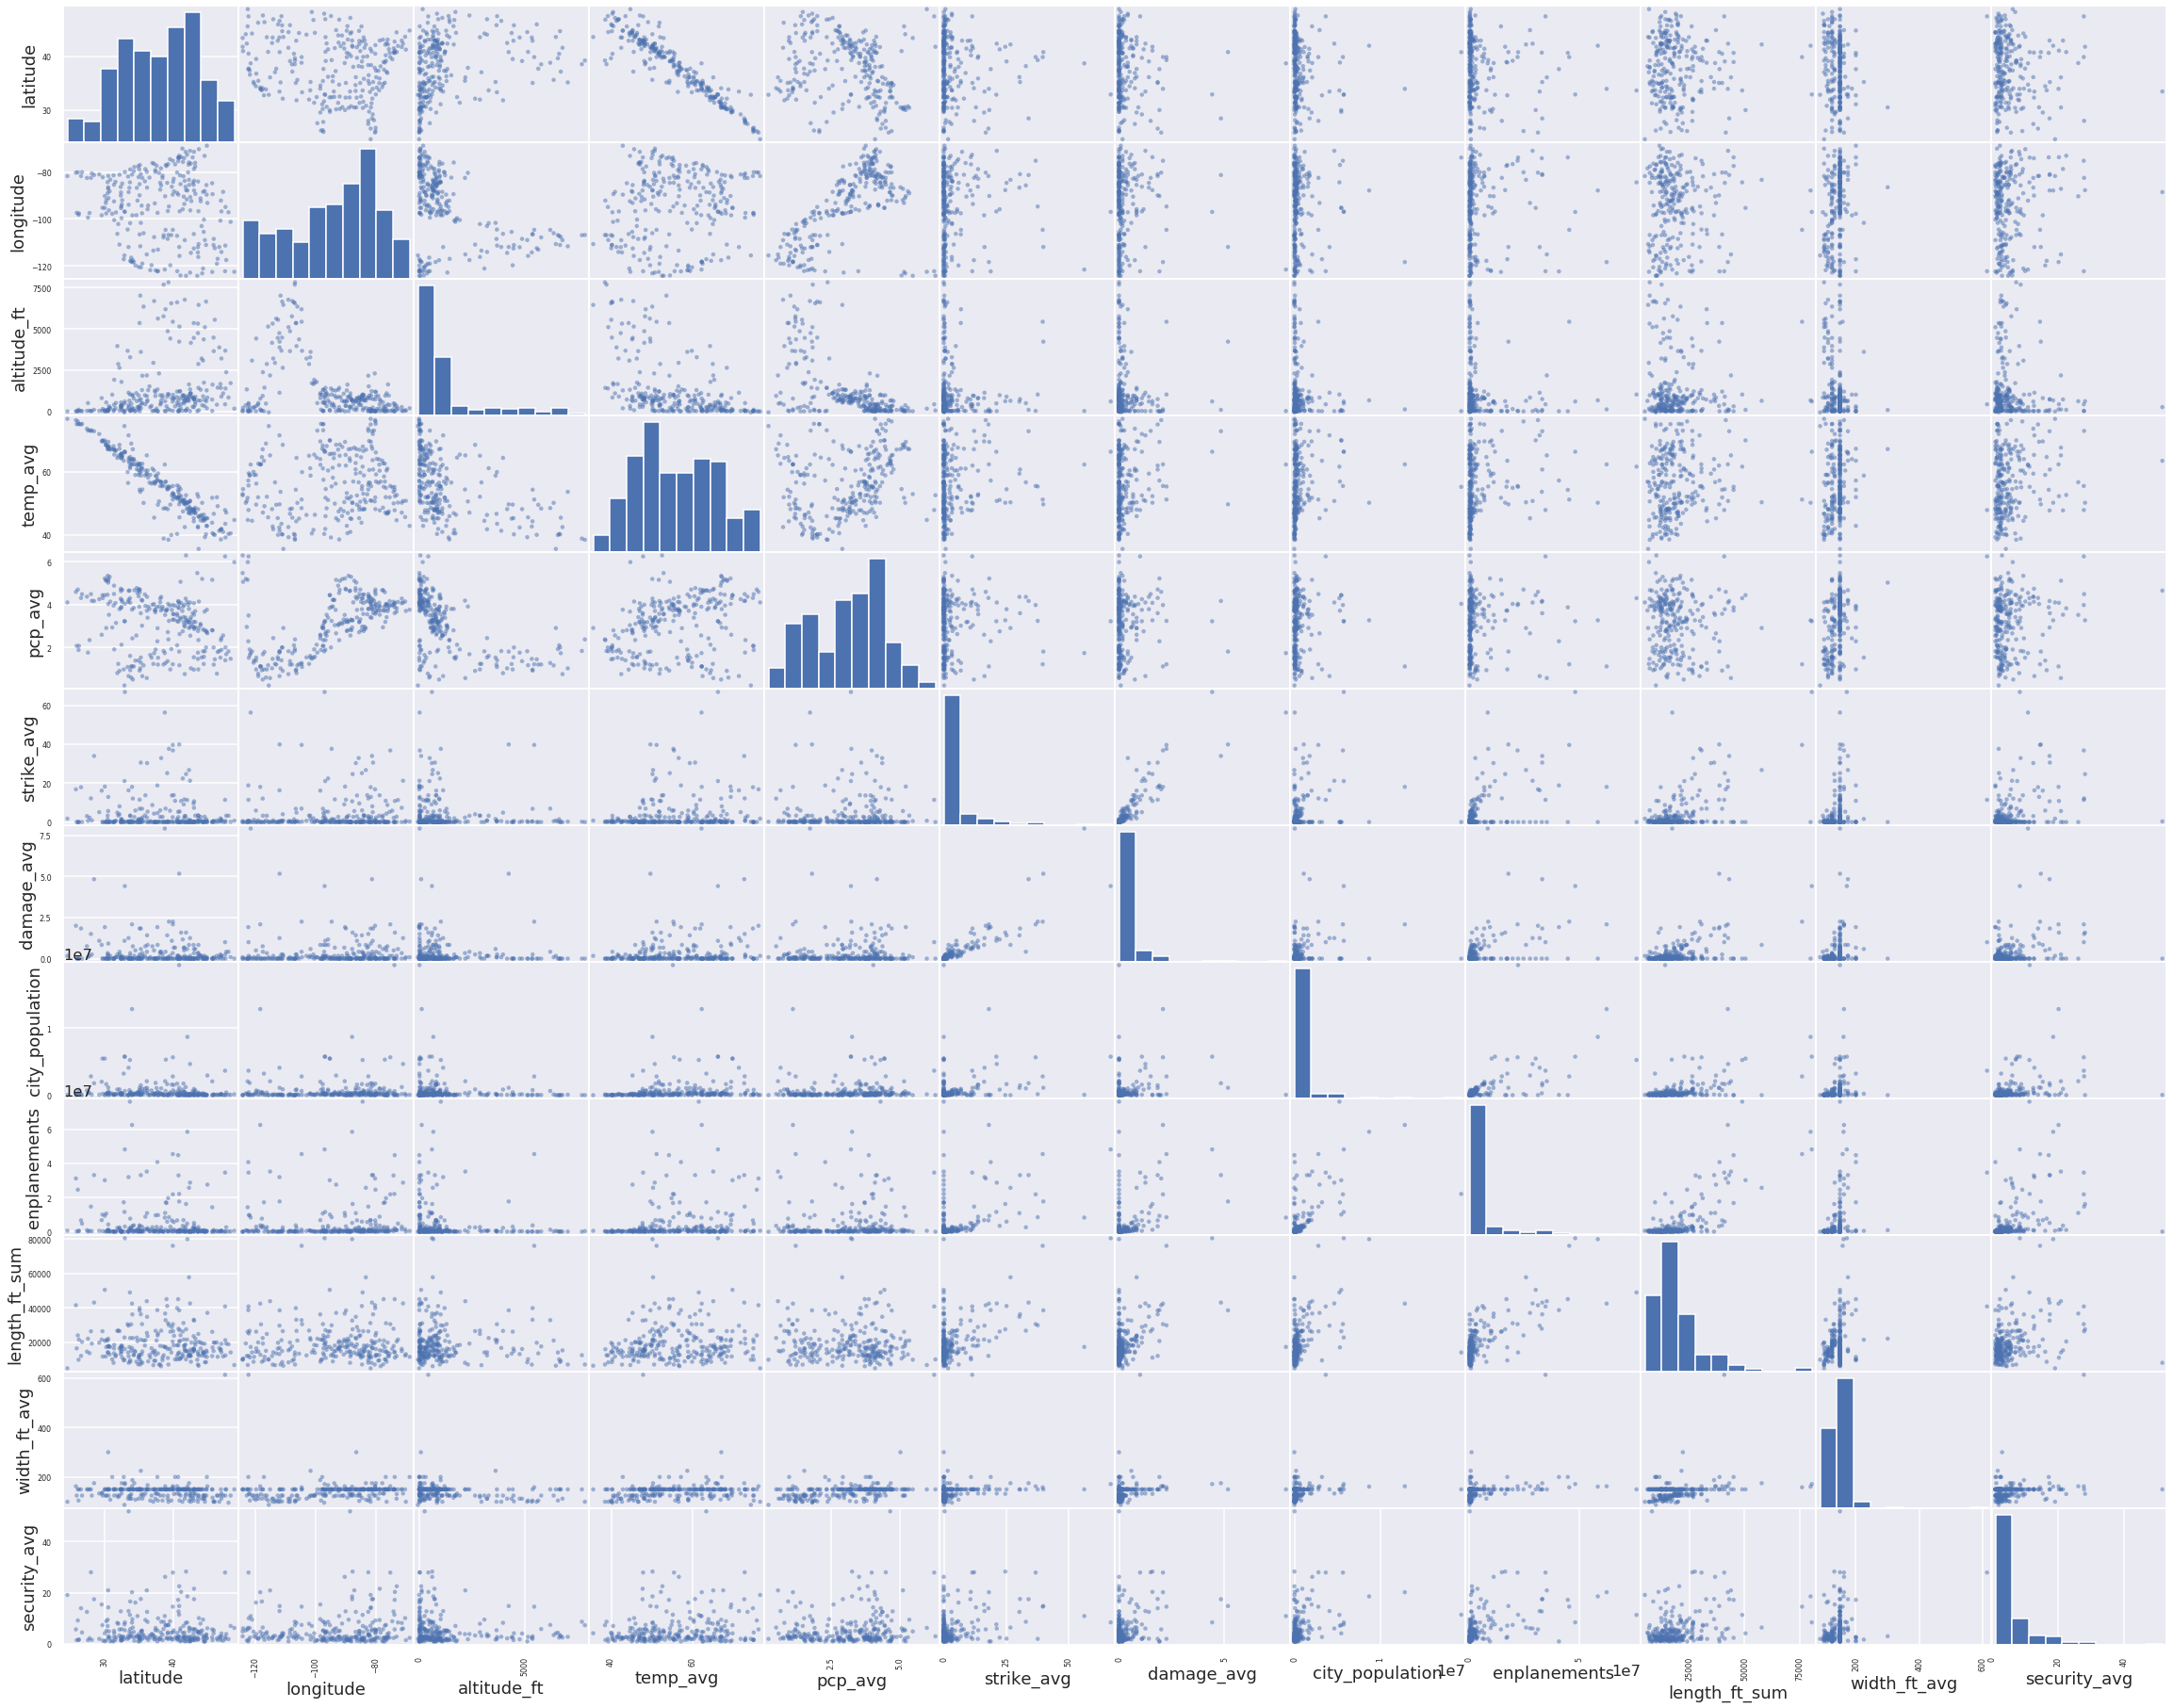

In [72]:
pd.plotting.scatter_matrix(df.loc[:,['latitude','longitude','altitude_ft','temp_avg','pcp_avg','strike_avg','damage_avg','city_population','enplanements','length_ft_sum','width_ft_avg','security_avg']],figsize = (40,32))

In [74]:
df['temp_avg'].describe()

count    253.000000
mean      55.955817
std        9.688768
min       35.578008
25%       48.169295
50%       55.254772
75%       64.004564
max       76.737344
Name: temp_avg, dtype: float64

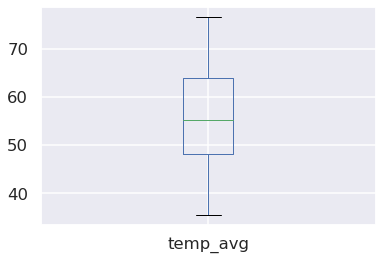

In [73]:
df.boxplot(column = ['temp_avg'])

In [76]:
# there is no outlier or extreme outlier in the dataset

In [75]:
df['pcp_avg'].describe()

count    253.000000
mean       3.113606
std        1.305792
min        0.235270
25%        1.907344
50%        3.303568
75%        4.095851
max        6.287635
Name: pcp_avg, dtype: float64

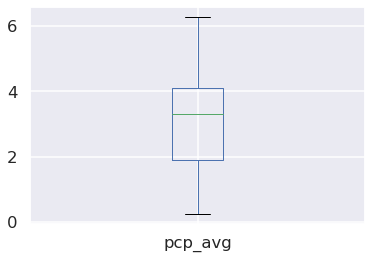

In [14]:
df.boxplot(column = ['pcp_avg'])

In [ ]:
# there is no outlier or extreme outlier in the dataset

In [78]:
df_strike_not0 = df[df['strike_avg'] != 0]
df_strike_not0['strike_avg'].describe()

count    142.000000
mean       7.492958
std       11.365994
min        0.083333
25%        0.666667
50%        2.666667
75%       10.395833
max       66.916667
Name: strike_avg, dtype: float64

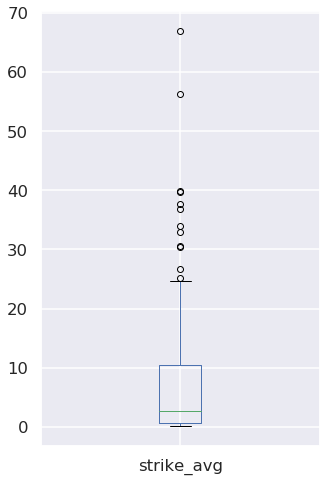

In [79]:
df_strike_not0.boxplot(column = ['strike_avg'],figsize = (5,8))

In [80]:
# 5% of the data is outlier

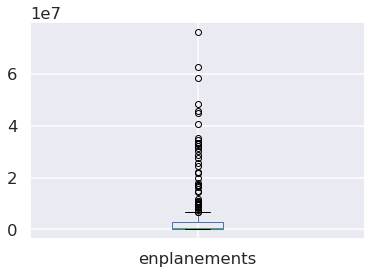

In [89]:
df_enplanements_not0 = df[df['enplanements'] != 0]
df_enplanements_not0.boxplot(column = ['enplanements'])

In [98]:
# There are lots of outlier, so the data set is not appropriate 
# The distribution of enplanements data is extremely skew 
# We have a look at the data which is large then the 75% of the dataset

In [91]:
df_enplanements_not0 = df_enplanements_not0['enplanements'].to_frame()
df_enplanements_not0.describe()

,enplanements
count,2.530000e+02
mean,4.930340e+06
std,1.119427e+07
min,9.460000e+03
25%,1.615725e+05
50%,5.456730e+05
75%,2.785062e+06
max,7.618486e+07


In [96]:
df_enplanements_75 = df_enplanements_not0[df_enplanements_not0['enplanements'] > 2.785062e+06] # 2.785062e+06 is the value of the 75% of dataset
df_enplanements_75.describe()

,enplanements
count,6.400000e+01
mean,1.786442e+07
std,1.651052e+07
min,2.785062e+06
25%,5.549120e+06
50%,1.079093e+07
75%,2.788376e+07
max,7.618486e+07


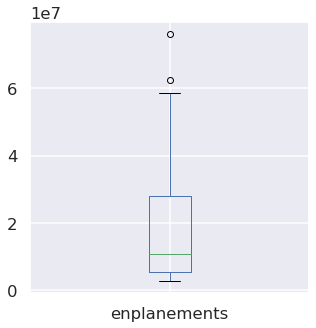

In [97]:
df_enplanements_75.boxplot(column = ['enplanements'],figsize = [5,5])

In [99]:
df['city_population'].describe()

count    2.530000e+02
mean     7.011998e+05
std      1.844147e+06
min      1.320000e+02
25%      5.061700e+04
50%      1.607420e+05
75%      4.678940e+05
max      1.935492e+07
Name: city_population, dtype: float64

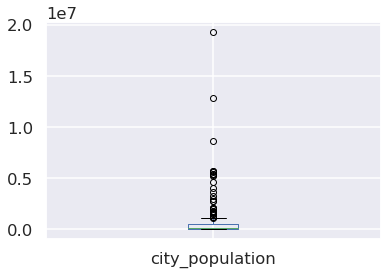

In [100]:
df.boxplot(column = ['city_population'])

In [101]:
df['length_ft_sum'].describe()

count      253.000000
mean     19481.430830
std      11379.818371
min       4801.000000
25%      12400.000000
50%      16353.000000
75%      22392.000000
max      80403.000000
Name: length_ft_sum, dtype: float64

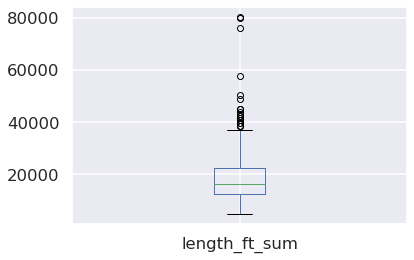

In [103]:
df.boxplot(column = ['length_ft_sum'])

In [104]:
df['security_avg'].describe()

count    249.000000
mean       5.751651
std        6.289760
min        1.000000
25%        2.000000
50%        3.333333
75%        6.419355
max       51.687500
Name: security_avg, dtype: float64

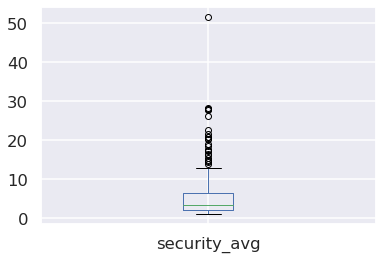

In [105]:
df.boxplot(column = ['security_avg'])

In [ ]:
# From the pairwise correlation form, we find that 'enplanements', 'city_population' and 'length_feet_sum' 
# have very closed correlation. Hence the number of cities always decreases with the increasing of the scale of city, 
# it makes sense that the distribution of 'city_population' extremely skew to the left. And this is why 
# the distribution of 'enplanements' and 'length_feet_sum' are quite similar with the distribution of 'city_population'.